In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1)/255

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
# 신경망 만들기 
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation= 'relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 100)               2

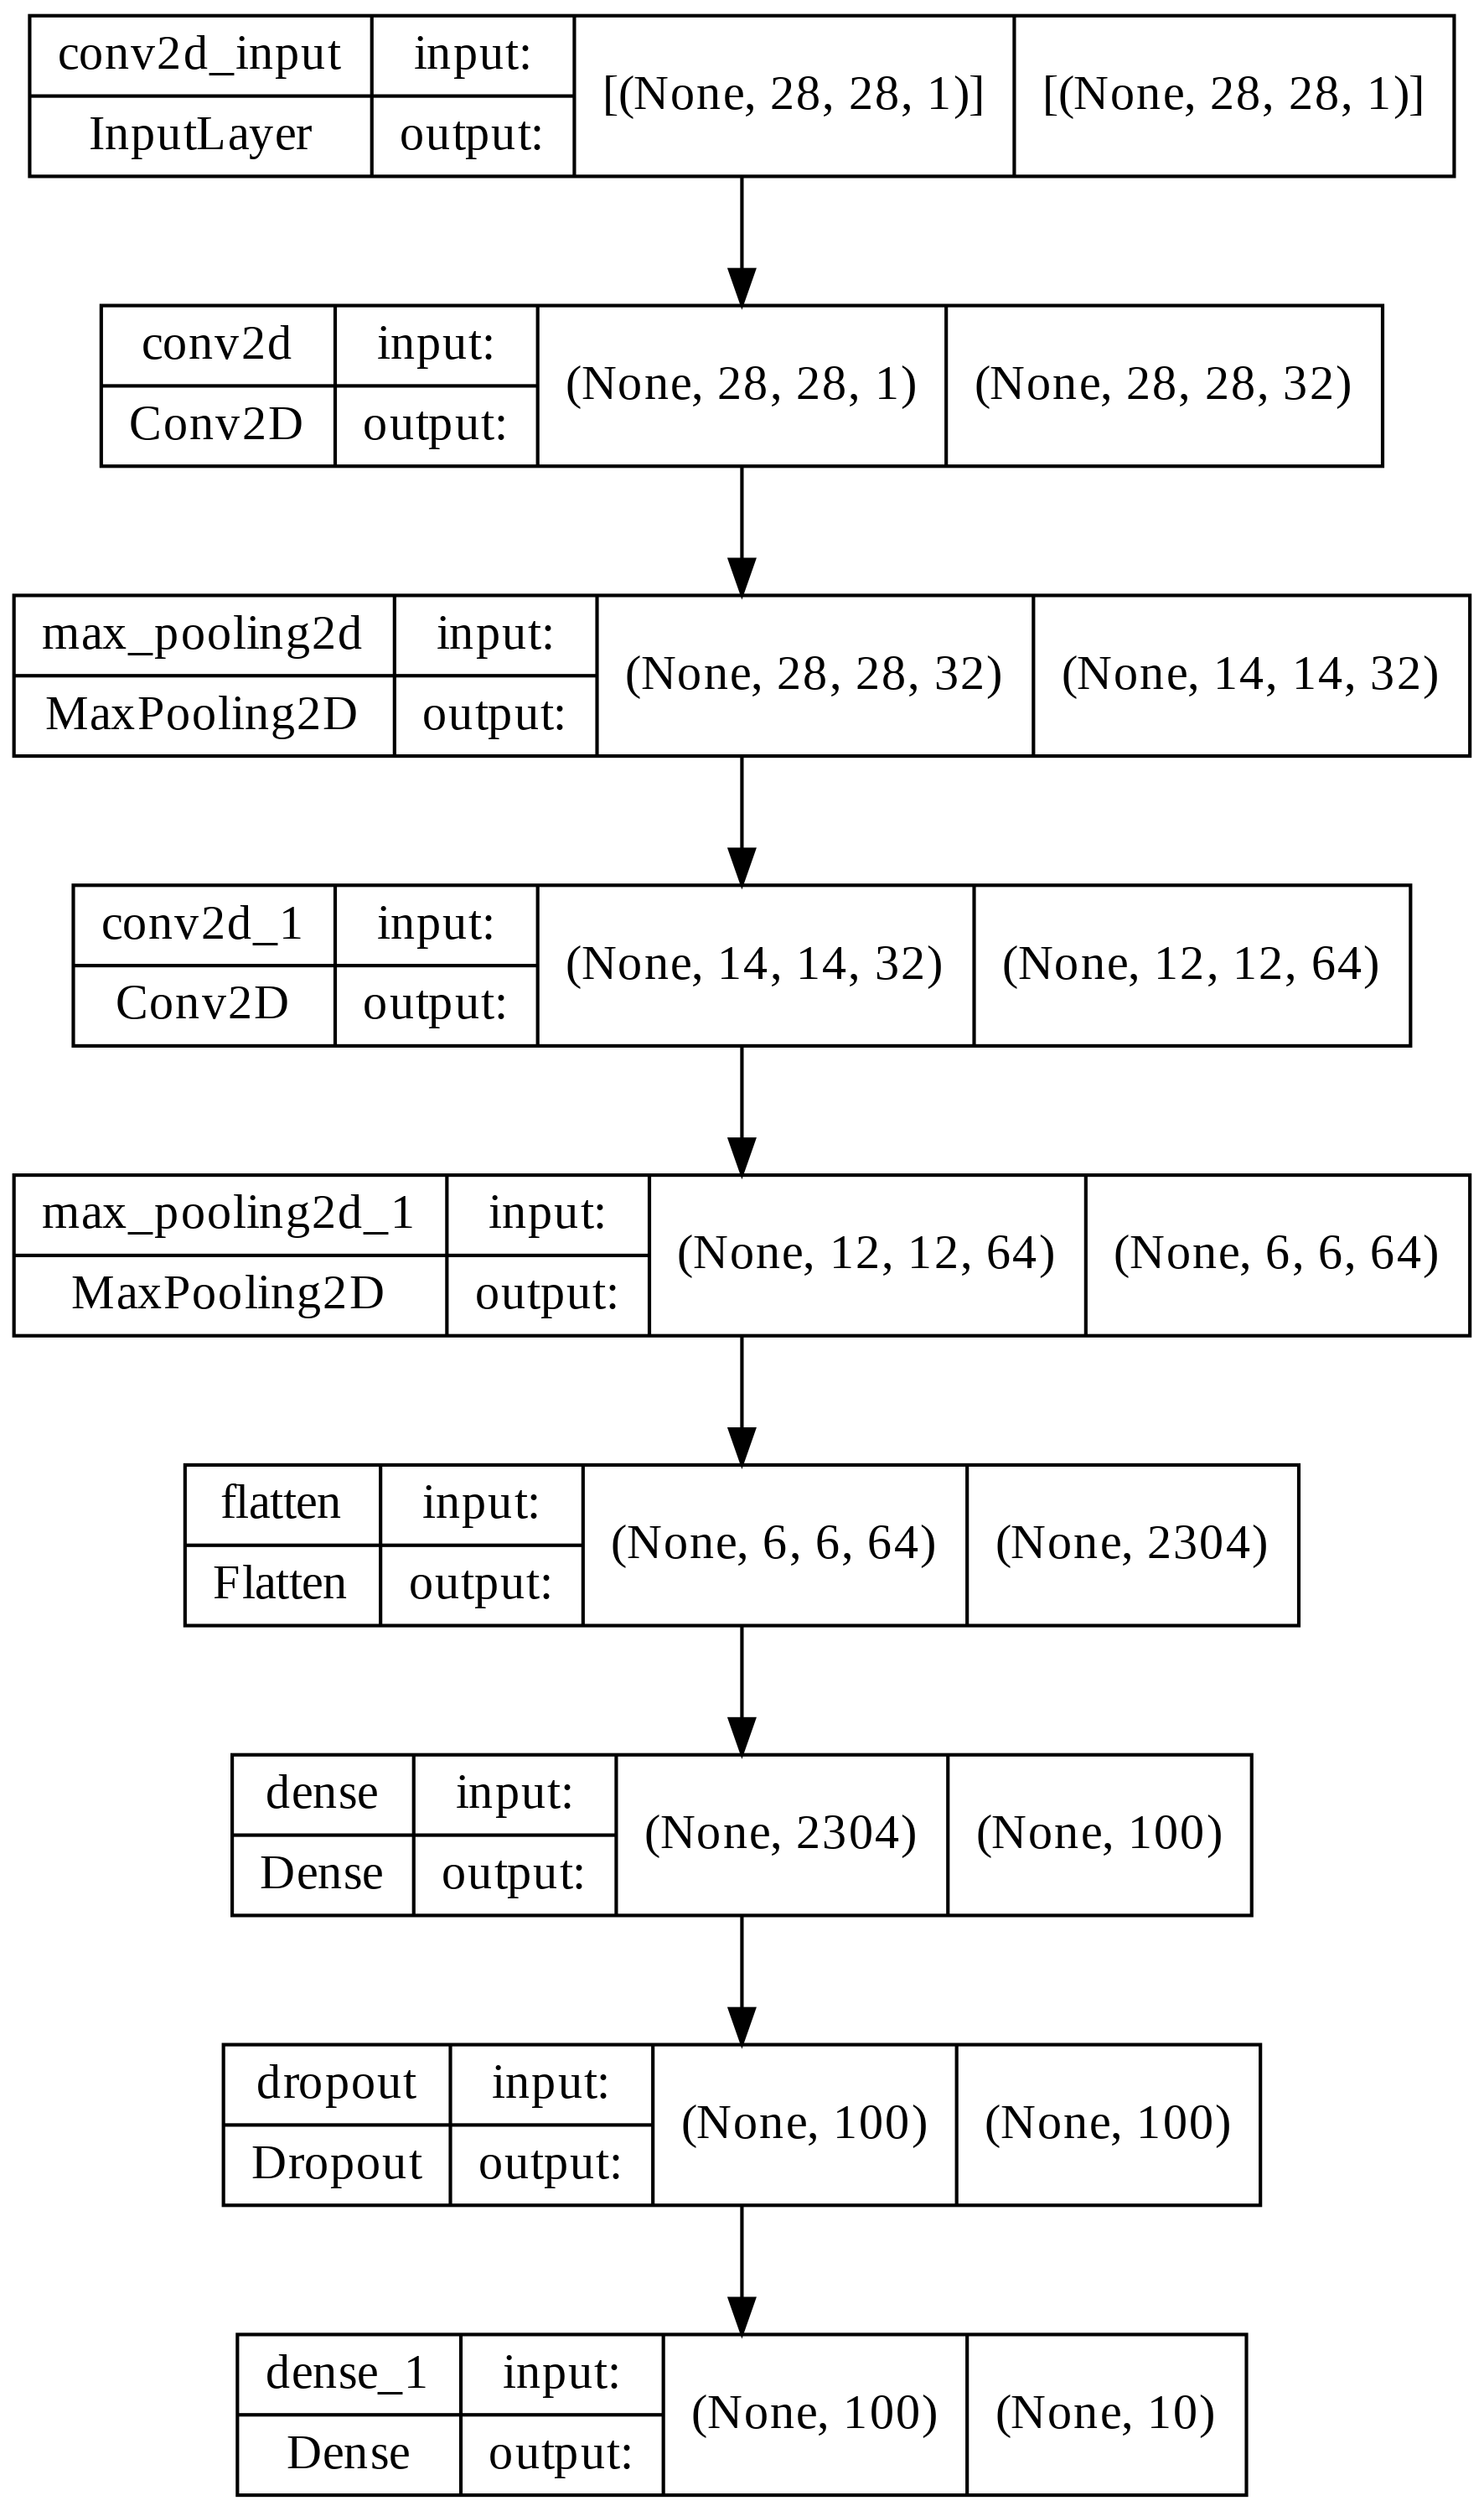

In [4]:
keras.utils.plot_model(model)
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

Epoch 1/20
1500/1500 [==============================] - 17s 4ms/step - loss: 0.5499 - accuracy: 0.8038 - val_loss: 0.3711 - val_accuracy: 0.8601
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3645 - accuracy: 0.8695 - val_loss: 0.2976 - val_accuracy: 0.8901
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3137 - accuracy: 0.8872 - val_loss: 0.2846 - val_accuracy: 0.8917
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2831 - accuracy: 0.8972 - val_loss: 0.2567 - val_accuracy: 0.9045
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2577 - accuracy: 0.9055 - val_loss: 0.2403 - val_accuracy: 0.9132
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2350 - accuracy: 0.9143 - val_loss: 0.2302 - val_accuracy: 0.9156
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2216 - accuracy: 0.9184 - val_loss: 0.2519 - val_accuracy

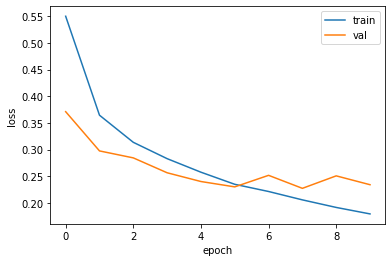

In [5]:
#모델 컴파일과 훈련

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [6]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2275 - accuracy: 0.9162


[0.22749467194080353, 0.9161666631698608]

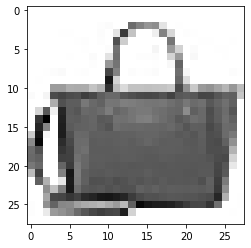

In [7]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [8]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[5.5431874e-16 1.5670742e-24 7.6470838e-23 1.2075623e-20 1.5440783e-19
  3.9984854e-19 9.6984931e-19 8.1279270e-16 1.0000000e+00 5.3235767e-16]]


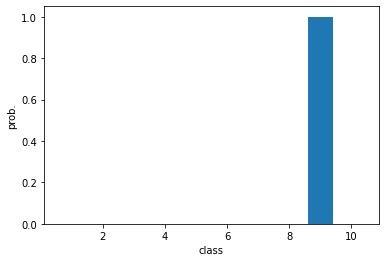

In [9]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [10]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앨클 부츠']

import numpy as np
print(classes[np.argmax(preds)])

test_scaled = test_input.reshape(-1, 28, 28, 1)/ 255.0

model.evaluate(test_scaled, test_target)

가방
313/313 [==============================] - 1s 3ms/step - loss: 0.2458 - accuracy: 0.9091


[0.24578864872455597, 0.9090999960899353]